In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

In [2]:
# import data set to df
df = pd.read_csv('database.csv')
df.head()

C:\Users\cmilb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [3]:
list(df.columns.values)

['Record ID',
 'Agency Code',
 'Agency Name',
 'Agency Type',
 'City',
 'State',
 'Year',
 'Month',
 'Incident',
 'Crime Type',
 'Crime Solved',
 'Victim Sex',
 'Victim Age',
 'Victim Race',
 'Victim Ethnicity',
 'Perpetrator Sex',
 'Perpetrator Age',
 'Perpetrator Race',
 'Perpetrator Ethnicity',
 'Relationship',
 'Weapon',
 'Victim Count',
 'Perpetrator Count',
 'Record Source']

# Find Total Homicide Counts over total period 1980-2016
 #### Rank State by Total

In [4]:
counts= df.groupby(['State'])
counts2 = counts['Year'].count().rename('total')
#counts.columns = ["_".join(x) for x in counts.columns.ravel()]
#counts.reset_index(inplace = True)
counts2

State
Alabama                 11376
Alaska                   1617
Arizona                 12871
Arkansas                 6947
California              99783
Colorado                 6593
Connecticut              4896
Delaware                 1179
District of Columbia     7115
Florida                 37164
Georgia                 21088
Hawaii                   1338
Idaho                    1150
Illinois                25871
Indiana                 11463
Iowa                     1749
Kansas                   3085
Kentucky                 6554
Louisiana               19629
Maine                     869
Maryland                17312
Massachusetts            6036
Michigan                28448
Minnesota                3975
Mississippi              6546
Missouri                14832
Montana                   601
Nebraska                 1331
Nevada                   5553
New Hampshire             655
New Jersey              14132
New Mexico               4272
New York                49268
Nort

In [5]:
counts3 = pd.DataFrame(counts2)
counts3.reset_index(inplace=True)
#counts3

In [6]:
counts3['Rank'] = counts3['total'].rank(method='min', ascending= False)
counts3

,State,total,Rank
0,Alabama,11376,20.0
1,Alaska,1617,39.0
2,Arizona,12871,17.0
3,Arkansas,6947,24.0
4,California,99783,1.0
5,Colorado,6593,25.0
6,Connecticut,4896,31.0
7,Delaware,1179,43.0
8,District of Columbia,7115,23.0
9,Florida,37164,4.0


In [7]:
counts3.to_csv('RankTotalHomicideTotalPeriod.csv', index= False)

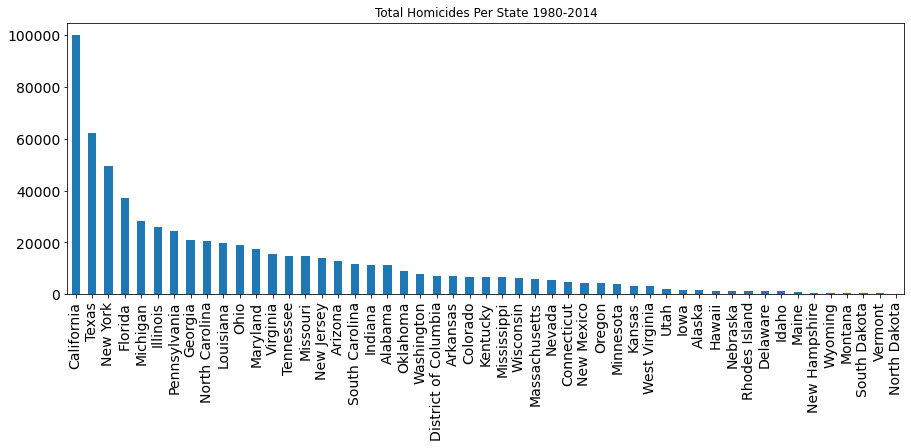

In [8]:
#bar plot for total homicides for each state for entire study

counts_sorted = counts3.sort_values('Rank')
counts_sorted.plot(x='State',y='total',kind='bar', legend=None,figsize =(15,5),xlabel="", fontsize=14, title= "Total Homicides Per State 1980-2014")
plt.show()

# ranking by year then state

In [9]:
df['Year'] = df['Year'].astype(object)
df.dtypes

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                     object
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

In [10]:
rys= df.groupby(['State'])
rys1=rys['Year'].value_counts().rename('total')
rys1

State    Year
Alabama  1980    513
         1994    501
         1993    477
         1995    467
         1990    463
                ... 
Wyoming  1987     11
         2001     11
         2008     10
         2006      9
         2010      8
Name: total, Length: 1759, dtype: int64

In [11]:
rys2 = pd.DataFrame(rys1)
rys2.reset_index(inplace=True)
rys2

,State,Year,total
0,Alabama,1980,513
1,Alabama,1994,501
2,Alabama,1993,477
3,Alabama,1995,467
4,Alabama,1990,463
...,...,...,...
1754,Wyoming,1987,11
1755,Wyoming,2001,11
1756,Wyoming,2008,10
1757,Wyoming,2006,9


In [12]:
rys2['Rank'] = rys2.groupby('Year')['total'].rank(method='min', ascending = False)
rys2

,State,Year,total,Rank
0,Alabama,1980,513,13.0
1,Alabama,1994,501,15.0
2,Alabama,1993,477,15.0
3,Alabama,1995,467,16.0
4,Alabama,1990,463,14.0
...,...,...,...,...
1754,Wyoming,1987,11,48.0
1755,Wyoming,2001,11,47.0
1756,Wyoming,2008,10,49.0
1757,Wyoming,2006,9,50.0


In [13]:
rys

In [14]:
rys2[(rys2['Year']==1980)]


,State,Year,total,Rank
0,Alabama,1980,513,13.0
46,Alaska,1980,47,41.0
96,Arizona,1980,293,22.0
114,Arkansas,1980,214,26.0
145,California,1980,3590,1.0
186,Colorado,1980,198,27.0
219,Connecticut,1980,158,30.0
249,Delaware,1980,44,42.0
296,District of Columbia,1980,180,28.0
309,Florida,1980,1508,4.0


# look at this later

# Weapon BreakDown

In [15]:
# total of weapon used in record
weapon_df = df['Weapon'].value_counts().to_frame()
weapon_df

,Weapon
Handgun,317484
Knife,94962
Blunt Object,67337
Firearm,46980
Unknown,33192
Shotgun,30722
Rifle,23347
Strangulation,8110
Fire,6173
Suffocation,3968


In [16]:
# breakdown of weapon by state
weapon_bd_state = df.groupby(['State'])
weapon_bd_state1 = weapon_bd_state['Weapon'].value_counts().rename('total')
weapon_bd_state2 = pd.DataFrame(weapon_bd_state1)
weapon_bd_state2.reset_index(inplace=True)
weapon_bd_state2

,State,Weapon,total
0,Alabama,Handgun,6352
1,Alabama,Knife,1632
2,Alabama,Shotgun,1028
3,Alabama,Unknown,1017
4,Alabama,Blunt Object,776
...,...,...,...
774,Wyoming,Drugs,4
775,Wyoming,Fire,4
776,Wyoming,Drowning,3
777,Wyoming,Fall,2


In [17]:
# breakdown of weapon by race
weapon_bd_race = df.groupby(['Perpetrator Race'])
weapon_bd_race1 = weapon_bd_race['Weapon'].value_counts().rename('total')
weapon_bd_race2 = pd.DataFrame(weapon_bd_race1)
weapon_bd_race2.reset_index(inplace=True)
weapon_bd_race2

,Perpetrator Race,Weapon,total
0,Asian/Pacific Islander,Handgun,2976
1,Asian/Pacific Islander,Knife,1136
2,Asian/Pacific Islander,Blunt Object,676
3,Asian/Pacific Islander,Firearm,258
4,Asian/Pacific Islander,Rifle,242
...,...,...,...
74,White,Drowning,660
75,White,Gun,543
76,White,Explosives,298
77,White,Poison,294


In [20]:
# breakdown of weapon by gender
weapon_bd_gender = df.groupby(['Perpetrator Sex'])
weapon_bd_gender1 = weapon_bd_gender['Weapon'].value_counts().rename('total')
weapon_bd_gender2 = pd.DataFrame(weapon_bd_gender1)
weapon_bd_gender2.reset_index(inplace=True)
weapon_bd_gender2

,Perpetrator Sex,Weapon,total
0,Female,Handgun,17107
1,Female,Knife,13748
2,Female,Blunt Object,5722
3,Female,Unknown,3683
4,Female,Shotgun,1733
5,Female,Rifle,1450
6,Female,Firearm,1287
7,Female,Suffocation,1051
8,Female,Fire,1000
9,Female,Drugs,569


# Who Did it

In [30]:
gender_perp = df['Perpetrator Sex'].value_counts().to_frame()
gender_perp

,Perpetrator Sex
Male,399541
Unknown,190365
Female,48548


In [19]:
who_did_it = df['Relationship'].value_counts().to_frame()
who_did_it

,Relationship
Unknown,273013
Acquaintance,126018
Stranger,96593
Wife,23187
Friend,21945
Girlfriend,16465
Son,9904
Family,9535
Husband,8803
Daughter,7539


In [23]:
#who did it with what
wdiw = df.groupby(['Relationship'])
wdiw2 = wdiw['Weapon'].value_counts().rename('total')
wdiw3 = pd.DataFrame(wdiw2)
wdiw3.reset_index(inplace=True)
wdiw3

,Relationship,Weapon,total
0,Acquaintance,Handgun,62674
1,Acquaintance,Knife,24469
2,Acquaintance,Blunt Object,13681
3,Acquaintance,Shotgun,8028
4,Acquaintance,Rifle,5636
...,...,...,...
402,Wife,Gun,44
403,Wife,Poison,44
404,Wife,Drowning,39
405,Wife,Explosives,10


In [26]:
#gender did it with what
gdiw = df.groupby(['Perpetrator Sex'])
gdiw2 = gdiw['Weapon'].value_counts().rename('total')
gdiw3 = pd.DataFrame(gdiw2)
gdiw3.reset_index(inplace=True)
gdiw3

,Perpetrator Sex,Weapon,total
0,Female,Handgun,17107
1,Female,Knife,13748
2,Female,Blunt Object,5722
3,Female,Unknown,3683
4,Female,Shotgun,1733
5,Female,Rifle,1450
6,Female,Firearm,1287
7,Female,Suffocation,1051
8,Female,Fire,1000
9,Female,Drugs,569
